# Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("file.csv")

In [3]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
df2=df.reset_index()['Close']

In [6]:
df2

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [7]:
df2.shape

(2035,)

In [8]:
import matplotlib.pyplot as plt

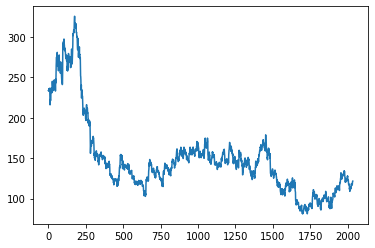

In [9]:
plt.plot(df2)

# LSTM are sensitive to the scale of the data , so we apply MinMax scaler

In [10]:
import numpy as np


In [11]:
df2

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [13]:
df2.shape

(2035, 1)

In [14]:
df2

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

# Splitting dataset into train and test split

In [15]:
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [16]:
training_size,test_size

(1322, 713)

In [17]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.25347222],
       [0.26041667],
       [0.2563317 ]])

In [18]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)    

In [19]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test , y_test = create_dataset(test_data, time_step)

In [20]:
print(X_train)

[[0.62418301 0.62214052 0.62622549 ... 0.83455882 0.86213235 0.85273693]
 [0.62214052 0.62622549 0.63378268 ... 0.86213235 0.85273693 0.87111928]
 [0.62622549 0.63378268 0.62234477 ... 0.85273693 0.87111928 0.84497549]
 ...
 [0.34517974 0.31781046 0.33047386 ... 0.2816585  0.27001634 0.26531863]
 [0.31781046 0.33047386 0.32128268 ... 0.27001634 0.26531863 0.27389706]
 [0.33047386 0.32128268 0.34007353 ... 0.26531863 0.27389706 0.25347222]]


In [21]:
print(X_test.shape), print(y_test.shape)

(612, 100)
(612,)


(None, None)

In [22]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [23]:
#reshape input to be [samples, time steps, features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [24]:
#Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 43s 997ms/step - loss: 0.0249 - val_loss: 0.0033
Epoch 2/100
20/20 [==============================] - 13s 650ms/step - loss: 0.0040 - val_loss: 0.0014
Epoch 3/100
20/20 [==============================] - 12s 614ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 4/100
20/20 [==============================] - 11s 547ms/step - loss: 0.0020 - val_loss: 8.9613e-04
Epoch 5/100
20/20 [==============================] - 11s 573ms/step - loss: 0.0015 - val_loss: 9.6511e-04
Epoch 6/100
20/20 [==============================] - 11s 542ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/100
20/20 [==============================] - 11s 531ms/step - loss: 0.0013 - val_loss: 8.6232e-04
Epoch 8/100
20/20 [==============================] - 11s 535ms/step - loss: 0.0013 - val_loss: 9.8324e-04
Epoch 9/100
20/20 [==============================] - 11s 554ms/step - loss: 0.0013 - val_loss: 8.7542e-04
Epoch 10/100
20/20 [==============================] - 11s 578m

20/20 [==============================] - 11s 536ms/step - loss: 3.2776e-04 - val_loss: 3.5164e-04
Epoch 76/100
20/20 [==============================] - 10s 528ms/step - loss: 2.8708e-04 - val_loss: 2.9491e-04
Epoch 77/100
20/20 [==============================] - 11s 570ms/step - loss: 2.8616e-04 - val_loss: 2.3090e-04
Epoch 78/100
20/20 [==============================] - 11s 539ms/step - loss: 2.9171e-04 - val_loss: 2.9096e-04
Epoch 79/100
20/20 [==============================] - 10s 520ms/step - loss: 2.8137e-04 - val_loss: 3.2263e-04
Epoch 80/100
20/20 [==============================] - 11s 529ms/step - loss: 3.2132e-04 - val_loss: 2.2901e-04
Epoch 81/100
20/20 [==============================] - 11s 553ms/step - loss: 2.9448e-04 - val_loss: 3.0023e-04
Epoch 82/100
20/20 [==============================] - 11s 534ms/step - loss: 2.8432e-04 - val_loss: 2.4150e-04
Epoch 83/100
20/20 [==============================] - 11s 534ms/step - loss: 3.0197e-04 - val_loss: 2.4281e-04
Epoch 84/100
2

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

In [ ]:
#Lets do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


In [ ]:
#transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

In [ ]:
train_predict

In [ ]:
#Plotting
#Shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:,:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[: , :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

In [ ]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

In [ ]:
x_input=test_data[613:].reshape(1,-1)

In [ ]:
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input= x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1 , n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df2)


In [ ]:
df3=df2.tolist()
df3.extend(lst_output)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df2[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
plt.plot(df3[1000:])

In [ ]:
Thank You!